# Exploratory Data Analysis

In [1]:
#Importing Necessary Packages
import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot
from datetime import datetime
import pickle

In [2]:
init_notebook_mode(connected=True)

In [3]:
#This is the Data from Data Wrangling
BA_data = pd.read_pickle('BAdata.pickle')

In [4]:
BA_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-28,295.810,296.9900,294.7400,296.35,1436543.0,0.0,1.0,281.849760,282.974072,280.830256,...,0.2224,0.0175,0.1940,0.2680,0.2310,0.0105,0.1933,0.2697,0.2315,0.0099
2017-12-27,296.410,296.8000,294.8000,295.62,1447837.0,0.0,1.0,282.421444,282.793038,280.887425,...,0.2260,0.0161,0.2000,0.2641,0.2320,0.0196,0.1996,0.2650,0.2323,0.0199
2017-12-26,295.540,297.4400,294.6500,295.36,1394737.0,0.0,1.0,281.592502,283.402835,280.744504,...,0.2265,0.0173,0.1993,0.2704,0.2348,0.0187,0.1986,0.2720,0.2353,0.0189
2017-12-22,295.135,296.5200,293.0100,295.10,2257000.0,0.0,1.0,281.206615,282.526252,279.181901,...,0.2284,0.0179,0.1999,0.2656,0.2328,0.0186,0.1991,0.2665,0.2328,0.0188
2017-12-21,298.040,298.3852,294.1301,295.03,5395193.0,0.0,1.0,283.974519,284.303428,280.249140,...,0.2176,0.0188,0.2002,0.2608,0.2305,0.0165,0.1996,0.2641,0.2318,0.0164


In [5]:
BA_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume', 'Hv10',
       'Hv20', 'Hv30', 'Phv10', 'Phv20', 'Phv30', 'IvCall10', 'IvPut10',
       'IvMean10', 'IvMeanSkew10', 'IvCall20', 'IvPut20', 'IvMean20',
       'IvMeanSkew20', 'IvCall30', 'IvPut30', 'IvMean30', 'IvMeanSkew30',
       'IvCall60', 'IvPut60', 'IvMean60', 'IvMeanSkew60', 'IvCall90',
       'IvPut90', 'IvMean90', 'IvMeanSkew90', 'IvCall120', 'IvPut120',
       'IvMean120', 'IvMeanSkew120', 'IvCall150', 'IvPut150', 'IvMean150',
       'IvMeanSkew150', 'IvCall180', 'IvPut180', 'IvMean180', 'IvMeanSkew180',
       'IvCall270', 'IvPut270', 'IvMean270', 'IvMeanSkew270', 'IvCall360',
       'IvPut360', 'IvMean360', 'IvMeanSkew360', 'IvCall720', 'IvPut720',
       'IvMean720', 'IvMeanSkew720', 'IvCall1080', 'IvPut1080', 'IvMean1080',
       'IvMeanSkew1080'],
      dtype='object')

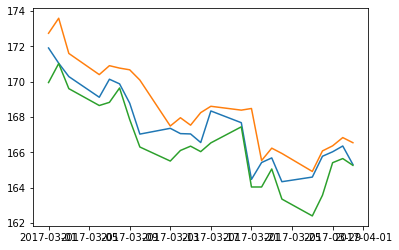

In [6]:
# Ploting the adjusted closing price, high, and low of the data set
plt.plot(BA_data[['Adj_Close', 'Adj_High', 'Adj_Low']].loc['March 2017'])

The chart shows a parallel relationship among the 3 features. 

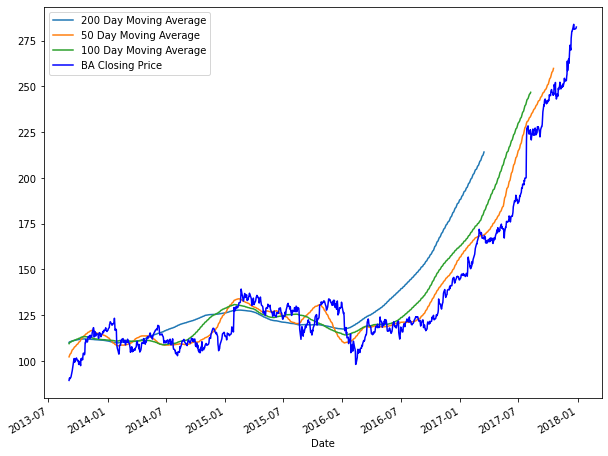

In [7]:
BA_data['roll100'] = BA_data['Adj_Close'].rolling(100).mean()
BA_data['roll200'] = BA_data['Adj_Close'].rolling(200).mean()
BA_data['roll50'] = BA_data['Adj_Close'].rolling(50).mean()
BA_data['roll10'] = BA_data['Adj_Close'].rolling(10).mean()

#plot Boeing Price along with moving averages

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

BA_data['roll200'].plot(label = '200 Day Moving Average')
BA_data['roll50'].plot(label = '50 Day Moving Average')
BA_data['roll100'].plot(label = '100 Day Moving Average')
BA_data['Adj_Close'].plot(label = 'BA Closing Price', color = 'blue')
plt.legend(loc = 'upper left')

This visualization is the closing price of Boeing stock from 2013 to 2018. This has the 50, 100, and 200 day moving averages. This will help us find patterns in stocks and indicates a change in the current trend.

In [8]:
BA_data['roll10'].head(11)

Date
2017-12-28           NaN
2017-12-27           NaN
2017-12-26           NaN
2017-12-22           NaN
2017-12-21           NaN
2017-12-20           NaN
2017-12-19           NaN
2017-12-18           NaN
2017-12-15           NaN
2017-12-14    281.703980
2017-12-13    281.274264
Name: roll10, dtype: float64

The gaps in the average on the right indicate that the averages have been calculated from most recent to least recent. Therefore, we need to fix this.

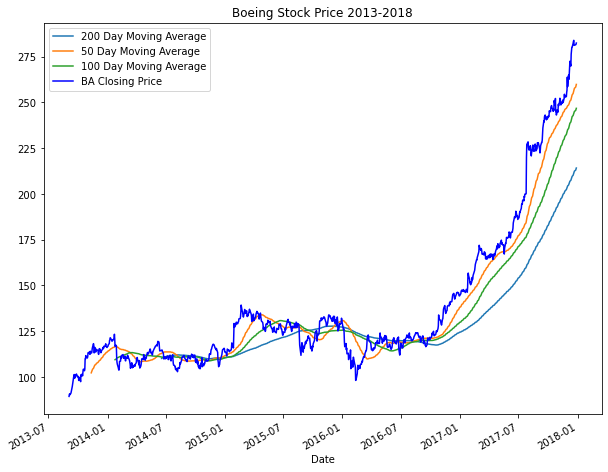

In [9]:
BA1 = BA_data.sort_index(ascending=True)
BA1 = BA1.reset_index()
BA1 = BA1.set_index('Date')

#Moving Aveages for Boeing
BA1['roll100'] = BA1['Adj_Close'].rolling(100).mean()
BA1['roll200'] = BA1['Adj_Close'].rolling(200).mean()
BA1['roll50'] = BA1['Adj_Close'].rolling(50).mean()
BA1['roll10'] = BA1['Adj_Close'].rolling(10).mean()

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

BA1['roll200'].plot(label = '200 Day Moving Average')
BA1['roll50'].plot(label = '50 Day Moving Average')
BA1['roll100'].plot(label = '100 Day Moving Average')
BA1['Adj_Close'].plot(label = 'BA Closing Price', color = 'blue')
plt.title('Boeing Stock Price 2013-2018')
plt.legend(loc = 'upper left')

We just had to reset the index and resort the dates. This is now fixed and correct. 

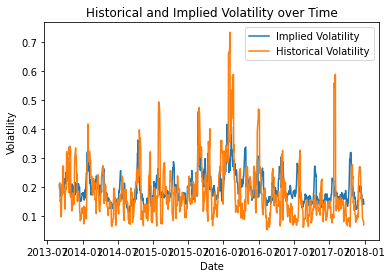

In [10]:
plt.plot(BA_data['IvMean10'], label = 'Implied Volatility')
plt.plot(BA_data['Hv10'], label = 'Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Historical and Implied Volatility over Time')
plt.legend(loc = 'upper right')

Implied volatility, also known as projected volatility, is one of the most important metrics for options traders. As the name suggests, it allows them to make a determination of just how volatile the market will be going forward. This concept also gives traders a way to calculate probability. Also referred to as statistical volatility, historical volatility gauges the fluctuations of underlying securities by measuring price changes over predetermined periods of time. It is the less prevalent metric compared to implied volatility because it isn't forward-looking. Implied volatility accounts for expectations for future volatility, which are expressed in options premiums, while historical volatility measures past trading ranges of underlying securities and indexes. You cannot really see much here. You need to do this in just a year to see if you can find antyhing from it. 

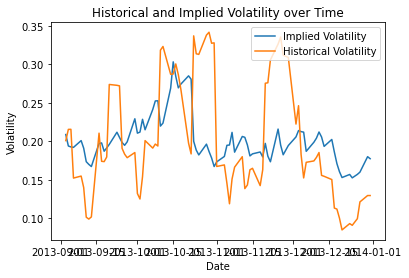

In [11]:
year1 = BA_data['Dec-31-2013': 'Jan-01-2013']
plt.plot(year1['IvMean10'], label = 'Implied Volatility')
plt.plot(year1['Hv10'], label = 'Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Historical and Implied Volatility over Time')
plt.legend(loc = 'upper right')

This is much better than the previous graph. Implied for the most part is higher but there are massive spkes in the historical volatility of the Boeing stock. 

In [12]:
adj = pd.DataFrame(BA_data)
adj = adj[['Adj_Close']]

In [13]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

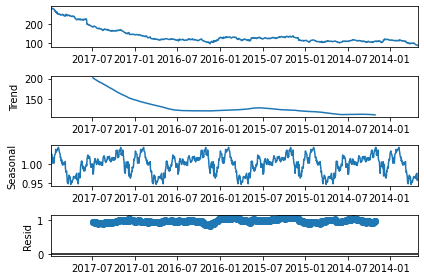

In [14]:
#Seasonality Trends
result = seasonal_decompose(adj, model = 'multiplicative', period = 252)
result.plot()
plt.show()

It looks like the seaonal trends are high a bit after the calendar year.

In [15]:
plt.rc('figure', figsize = (10, 5))

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` v

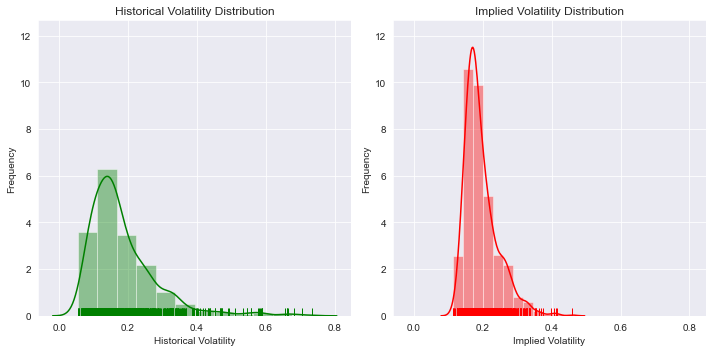

In [17]:
import seaborn as sns
fig = plt.figure()

sns.set_style('darkgrid')

ax1 = fig.add_subplot (1,2,1)

sns.distplot(BA1['Hv10'], kde = True, rug = True, color = 'green', bins = 12)
ax1.set_title('Historical Volatility Distribution')
ax1.set_xlabel('Historical Volatility')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot (1,2,2, sharey = ax1, sharex = ax1)

sns.distplot(BA1['IvMean10'], kde = True, rug = True, color = 'red', bins = 12)
ax2.set_title('Implied Volatility Distribution')
ax2.set_xlabel('Implied Volatility')
ax2.set_ylabel('Frequency')

plt.tight_layout()

Historical has a much wider tail while Implied has a much steeper one. Both are skewed to the right. 

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\distributions.py:2055: FutureWarn

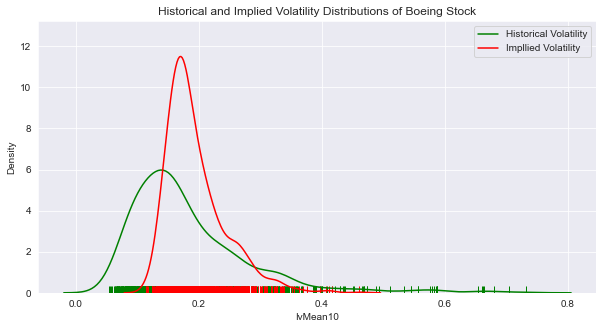

In [18]:
sns.distplot(BA1['Hv10'], label = 'Historical Volatility', hist = False, rug = True, color = 'green', bins = 12)
sns.distplot(BA1['IvMean10'], label = 'Impllied Volatility', hist = False, rug = True, color = 'red', bins = 12)
plt.legend()
plt.title('Historical and Implied Volatility Distributions of Boeing Stock')
plt.show()

This is just the two plots being plotted on top of each other. This helps us identify several trends about Boeing's stock and the relationship of historical to implied volatility of Boeing's options. 

<AxesSubplot:>

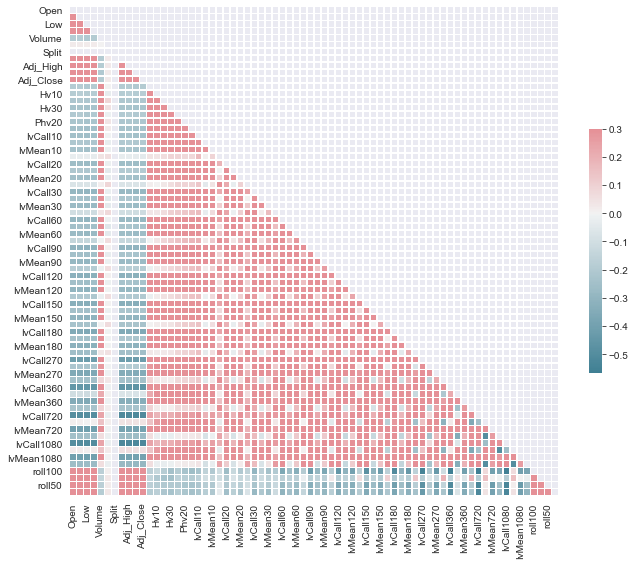

In [19]:
#Set the Correlation
corr = BA_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Drawing the Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center = 0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

There is a lot going on here. We need less categories to really analyze this. 

In [20]:
BA_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2017-12-28 to 2013-09-03
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1090 non-null   float64
 1   High            1090 non-null   float64
 2   Low             1090 non-null   float64
 3   Close           1090 non-null   float64
 4   Volume          1090 non-null   float64
 5   Dividend        1090 non-null   float64
 6   Split           1090 non-null   float64
 7   Adj_Open        1090 non-null   float64
 8   Adj_High        1090 non-null   float64
 9   Adj_Low         1090 non-null   float64
 10  Adj_Close       1090 non-null   float64
 11  Adj_Volume      1090 non-null   float64
 12  Hv10            1090 non-null   float64
 13  Hv20            1090 non-null   float64
 14  Hv30            1090 non-null   float64
 15  Phv10           1090 non-null   float64
 16  Phv20           1090 non-null   float64
 17  Phv30          

In [21]:
BA_data = BA_data.drop(BA_data.filter(regex='Call').columns, axis = 1)
BA_data = BA_data.drop(BA_data.filter(regex='Put').columns, axis = 1)

Call and put implied volatilities are very similar. I decided to drop them to make this much clearer. 

In [22]:
BA_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2017-12-28 to 2013-09-03
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1090 non-null   float64
 1   High            1090 non-null   float64
 2   Low             1090 non-null   float64
 3   Close           1090 non-null   float64
 4   Volume          1090 non-null   float64
 5   Dividend        1090 non-null   float64
 6   Split           1090 non-null   float64
 7   Adj_Open        1090 non-null   float64
 8   Adj_High        1090 non-null   float64
 9   Adj_Low         1090 non-null   float64
 10  Adj_Close       1090 non-null   float64
 11  Adj_Volume      1090 non-null   float64
 12  Hv10            1090 non-null   float64
 13  Hv20            1090 non-null   float64
 14  Hv30            1090 non-null   float64
 15  Phv10           1090 non-null   float64
 16  Phv20           1090 non-null   float64
 17  Phv30          

In [23]:
#Drop more unnecessary columns to improve the heat map 
BA1 = BA_data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split'])

In [24]:
BA1 = BA1.drop(columns = ['IvMeanSkew60', 'IvMeanSkew90', 'IvMeanSkew120', 'IvMeanSkew150', 'IvMeanSkew180', 'IvMeanSkew270',
                         'IvMeanSkew360', 'IvMeanSkew720', 'IvMeanSkew1080'])

<AxesSubplot:>

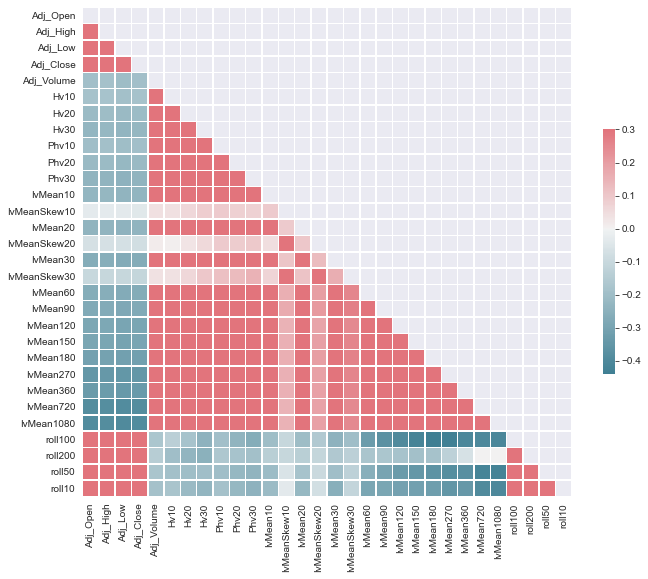

In [25]:
corr1 = BA1.corr()

mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center = 0, 
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

This heatmap is much better visually. The Historical volatility to stock prices has no correlation. Stocks that trend higher have a lower volatility. Historical volatility has positive correlation to implied volaitility. The higher volume correlates to greater historical volatility. 

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

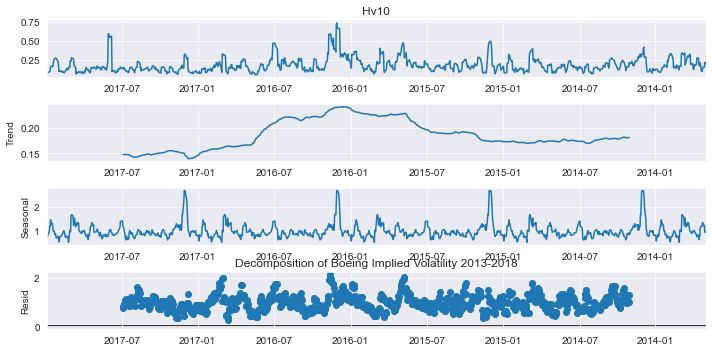

In [27]:
vol = BA1['Hv10']

result = seasonal_decompose(vol, model='multiplicative', period=252)
result.plot()
plt.title('Decomposition of Boeing Implied Volatility 2013-2018')
plt.show()

The seasonal trend for implied volatility is higher at the end of the calendar year towards Christmas and then goes down after the New year. 

[]

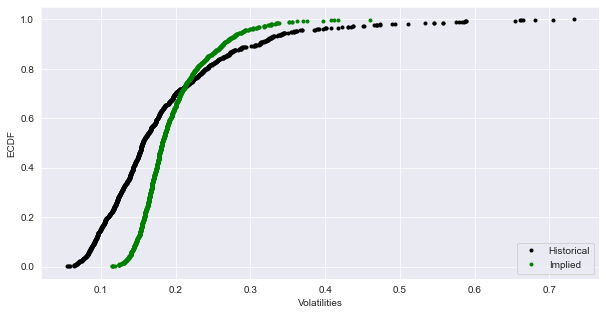

In [28]:
x = np.sort(BA1['Hv10'])
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'black')

x1 = np.sort(BA1['IvMean10'])
y1 = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x1, y1, marker = '.', linestyle = 'none', color = 'green')

plt.legend(('Historical', 'Implied'), loc = 'lower right')
plt.xlabel('Volatilities')
plt.ylabel('ECDF')
plt.plot()

Text(0.5, 1.0, 'ECDF of 30 Day Volatilities')

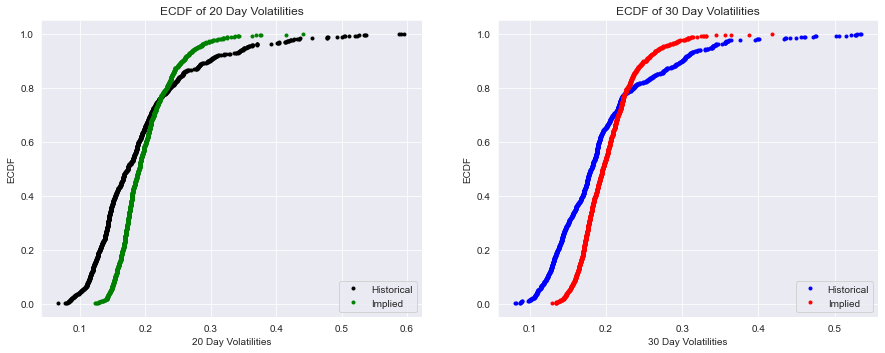

In [29]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,2,1)
xHv20 = np.sort(BA1['Hv20'])
yHv20 = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(xHv20, yHv20, marker = '.', linestyle = 'none', color = 'black')

xIv20 = np.sort(BA1['IvMean20'])
yIv20 = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(xIv20, yIv20, marker = '.', linestyle = 'none', color = 'green')
plt.legend(('Historical', 'Implied'), loc = 'lower right')
plt.xlabel('20 Day Volatilities')
plt.ylabel('ECDF')
plt.title('ECDF of 20 Day Volatilities')

ax2 = fig.add_subplot (2,2,2)
xHv30 = np.sort(BA1['Hv30'])
yHv30 = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(xHv30, yHv30, marker = '.', linestyle = 'none', color = 'blue')

xIv30 = np.sort(BA1['IvMean30'])
yIv30 = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(xIv30, yIv30, marker = '.', linestyle = 'none', color = 'red')
plt.legend(('Historical', 'Implied'), loc = 'lower right')
plt.xlabel('30 Day Volatilities')
plt.ylabel('ECDF')
plt.title('ECDF of 30 Day Volatilities')

An ECDF is an estimator of the Cumulative Distribution Function. The ECDF essentially allows you to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set. This is the empirical distribution function of the 20 and 30 days volatilities. There are a greater amount of days where the implied volatility is below historical volatility. Given time, historical volatilites will regress back to normal and these are just outliers. 

In [31]:
from sklearn.linear_model import LinearRegression

BA2 = BA1.drop(['Hv20', 'Hv30', 'Phv20', 'Phv30'], axis = 1)

HistVol = BA2.drop('Hv10', axis = 1)

lm = LinearRegression()

HistVol.fillna(HistVol.mean(), inplace=True)

HistVol.dropna(inplace=True)

lm.fit(HistVol, BA1.Hv10)

pd.DataFrame({'features': HistVol.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Adj_Open,-4.773942e-03
1,Adj_High,-2.353279e-05
2,Adj_Low,5.486552e-03
3,Adj_Close,-7.867238e-04
4,Adj_Volume,9.950297e-09
5,Phv10,8.757518e-01
6,IvMean10,8.577963e-02
7,IvMeanSkew10,1.580734e-01
8,IvMean20,-1.985903e-02
9,IvMeanSkew20,-3.697895e-01


These are the correlation coefficients of the other features and how they relate to the 10 day historical volatility of the stock. 

C:\Users\bsnus\anaconda3\envs\stan_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Relationship between Predicted and Actual Volatility')

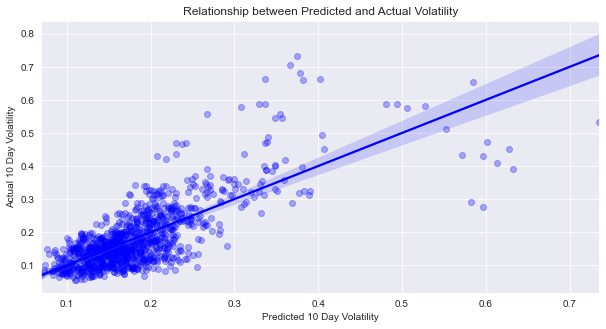

In [34]:
sns.regplot((lm.predict(HistVol)), BA1.Hv10, color = 'blue', scatter_kws={'alpha':0.3})
plt.xlabel('Predicted 10 Day Volatility')
plt.ylabel('Actual 10 Day Volatility')
plt.title('Relationship between Predicted and Actual Volatility')

This is regression plot. When the actual volatility goes above 30%, the model has trouble predicting the actual volatility. There are however are lot of prediction in the 15 - 30% range that are higher than actual volatility. 